# Projekt KNDS

In [47]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


**Import bibliotek**

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Import funkcji**

In [49]:
import dataAnalysis as dataAnalysis
import dataProcessing as dataProcessing
import regressionModel as regressionModel
import logisticRegressionModel as logisticRegressionModel
import decisionTreeModel as decisionTreeModel
import randomForest as randomForest
import adaBoost as adaBoost
import modelDescription as modelDescription

**Import danych**

In [50]:
def getData(filePath):
    dataset = pd.read_csv(filePath)
    return dataset

def printData(data, rows):
    print(data.head(rows))


dataFilePath = '../Resources/Hotel_Reservations.csv'
data = getData(dataFilePath)

**Analiza zbioru**

  1. Analiza podstawowa

In [51]:
dataAnalysis.analyzeData(data)

Analyzing data...
Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-n

  2. Rozkłady zmiennych numerycznych

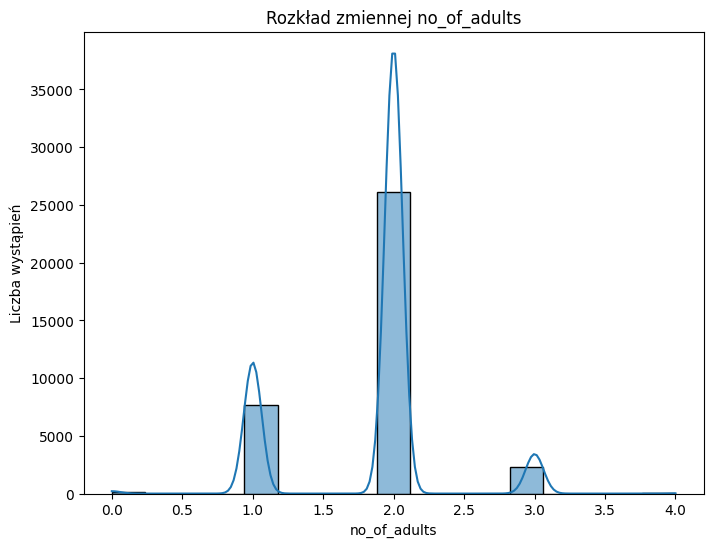

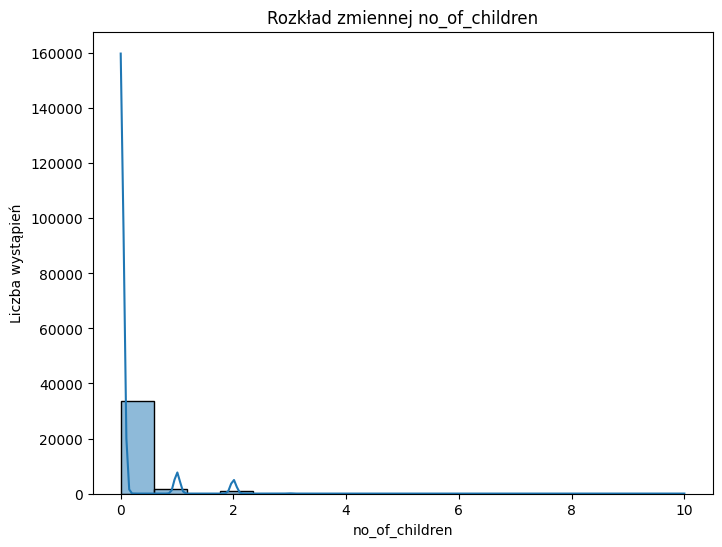

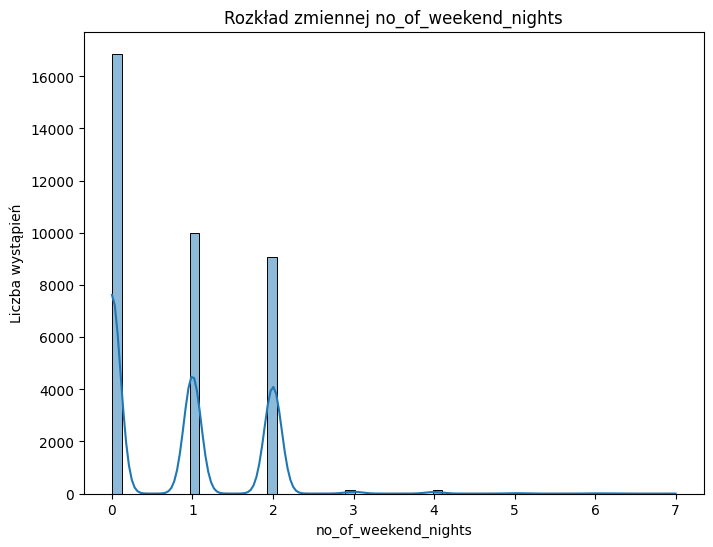

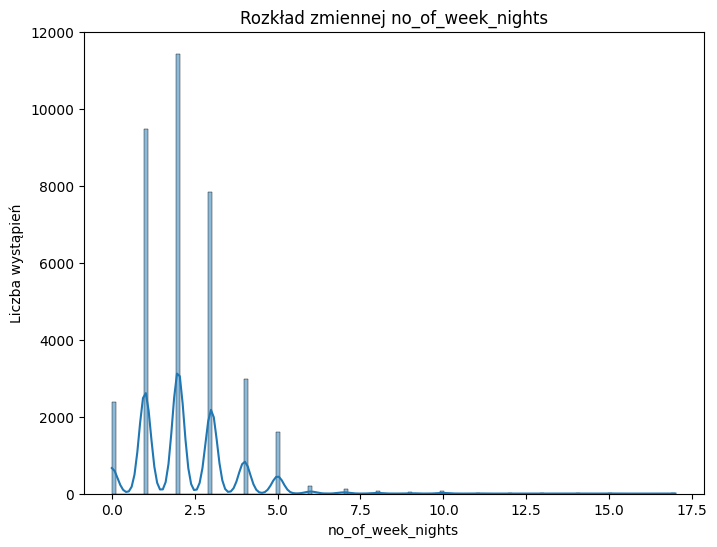

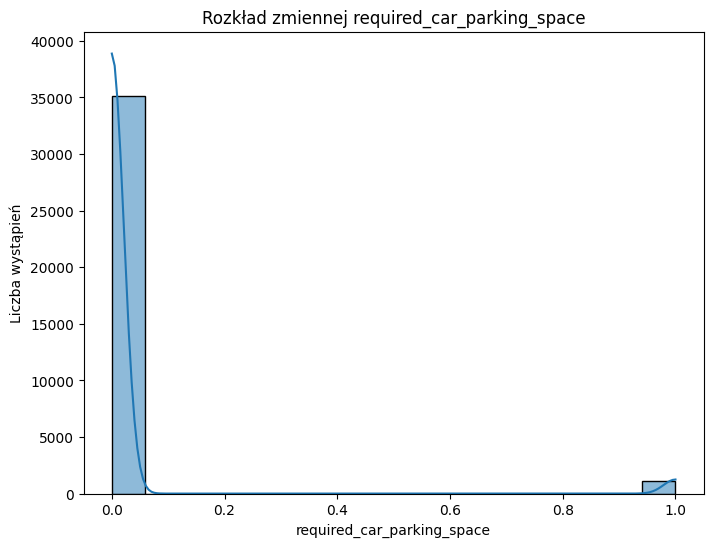

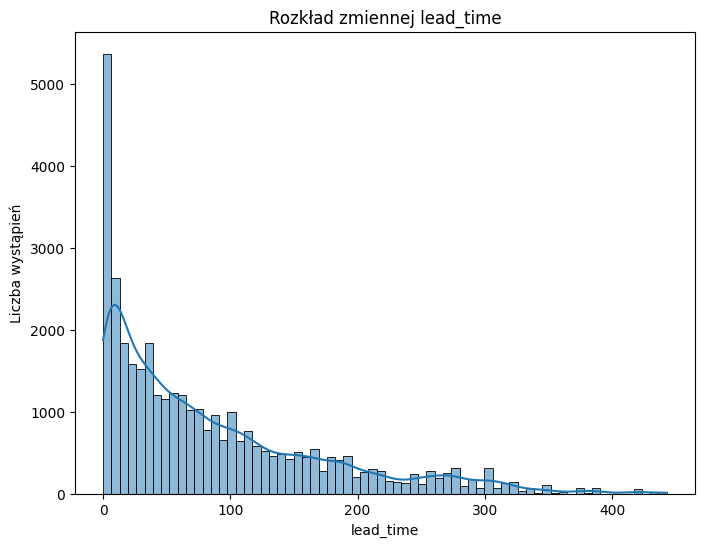

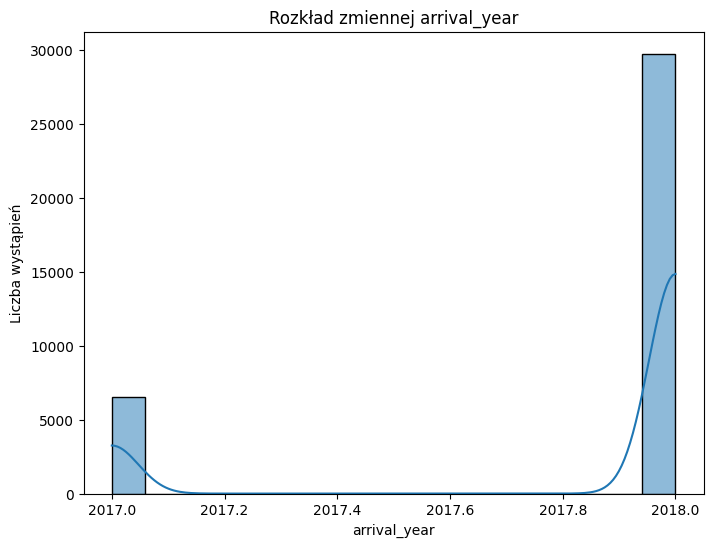

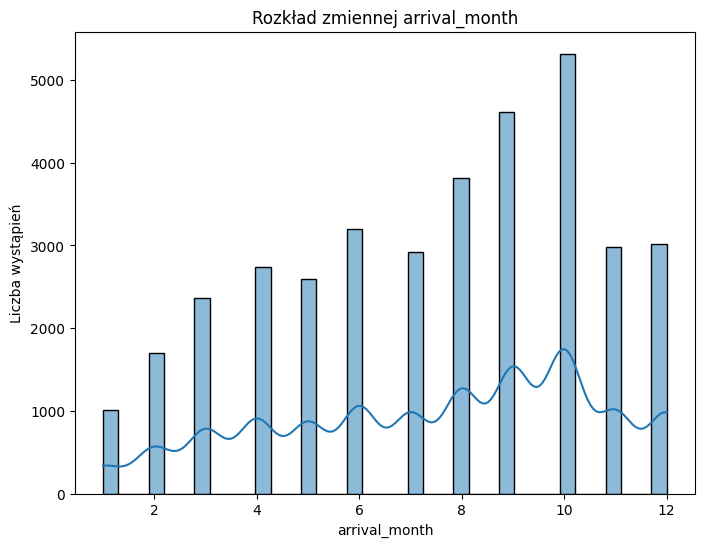

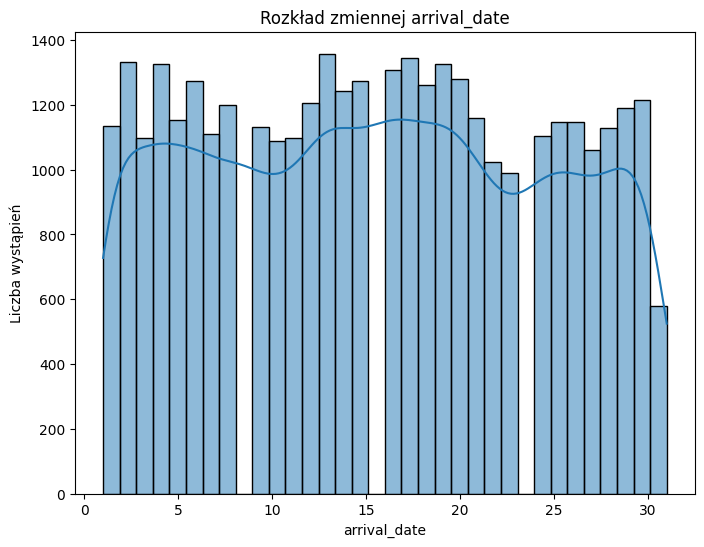

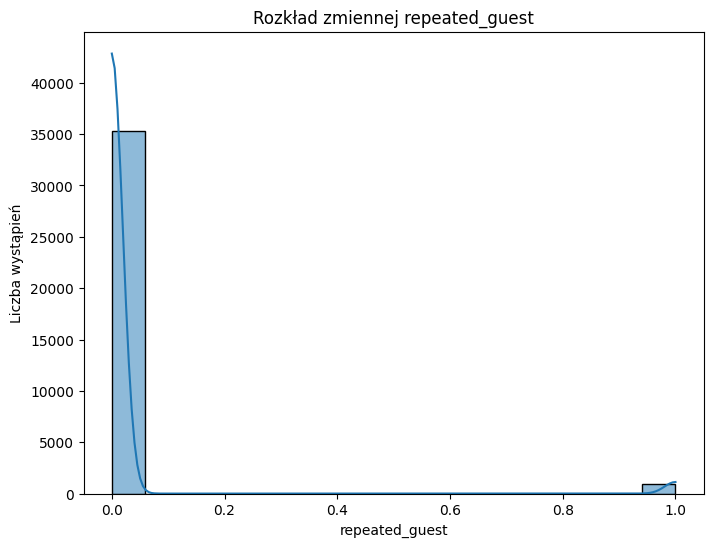

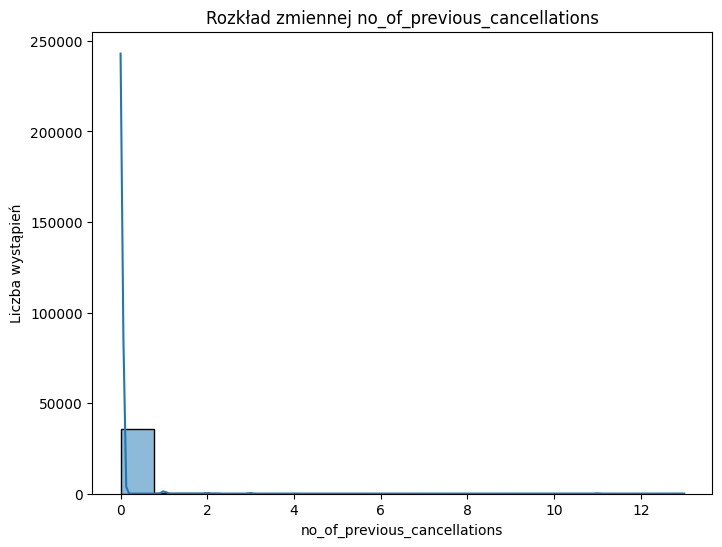

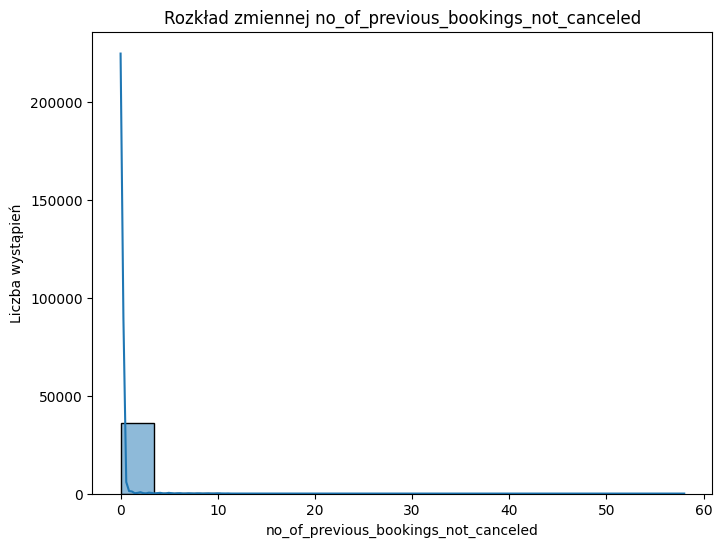

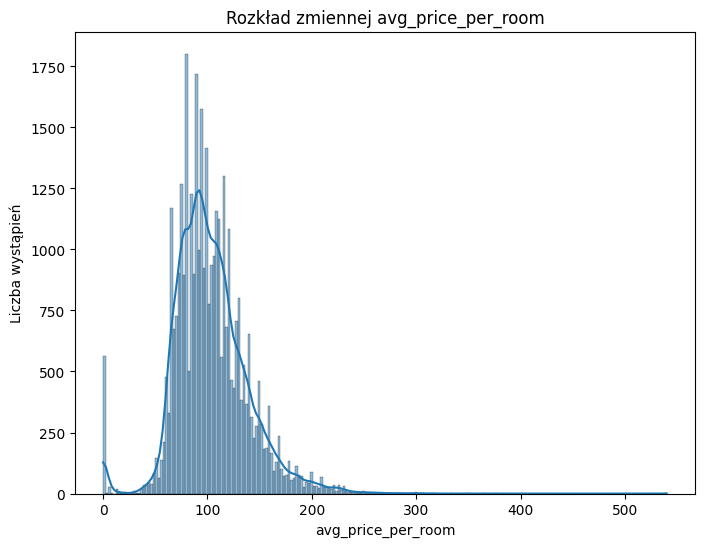

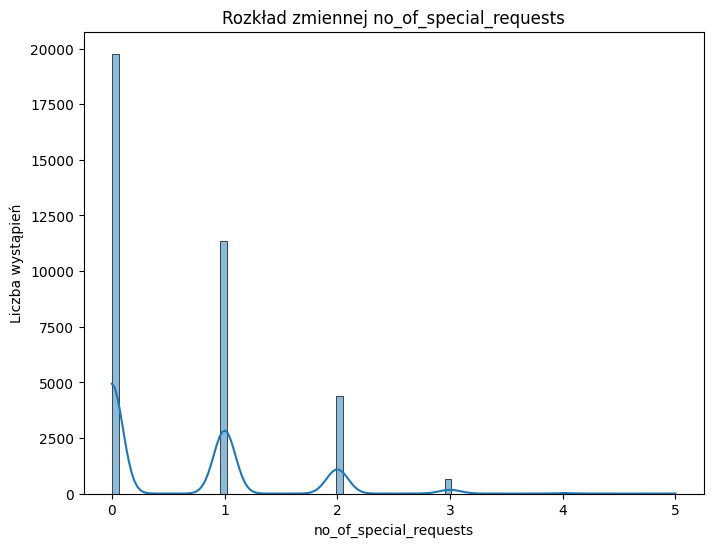

In [52]:
dataAnalysis.plotHist(data)

**Uzasadnienie występowania rezerwacji z ceną za pokój równą zero**

Duża liczba rezerwacji z ceną  za pokój (avg_price_per_room) równą zero wynika z dwóch czynników. Cena za pokój jest równa zero kiedy typ gościa hotelowego (zmienna market_segment_type) przyjumuje wartość "Complementary", co oznacza, że rezerwacja nie jest typową rezerwacją i cena za pokój wynosi 0. Cena za pokój wyniesie 0 również gdy klient nie podał ani liczby nocy w tygodniu roboczym, ani liczby nocy weekendowych.

In [53]:
pd.set_option('display.max_rows', None)
data[data["avg_price_per_room"] == 0].head(40)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
63,INN00064,1,0,0,1,Meal Plan 1,0,Room_Type 1,2,2017,9,10,Complementary,0,0,0,0.0,1,Not_Canceled
145,INN00146,1,0,0,2,Meal Plan 1,0,Room_Type 1,13,2018,6,1,Complementary,1,3,5,0.0,1,Not_Canceled
209,INN00210,1,0,0,0,Meal Plan 1,0,Room_Type 1,4,2018,2,27,Complementary,0,0,0,0.0,1,Not_Canceled
266,INN00267,1,0,0,2,Meal Plan 1,0,Room_Type 1,1,2017,8,12,Complementary,1,0,1,0.0,1,Not_Canceled
267,INN00268,1,0,2,1,Meal Plan 1,0,Room_Type 1,4,2017,8,23,Complementary,0,0,0,0.0,1,Not_Canceled
288,INN00289,2,0,0,1,Meal Plan 1,0,Room_Type 2,9,2018,9,7,Complementary,1,0,3,0.0,1,Not_Canceled
346,INN00347,1,0,0,2,Meal Plan 1,0,Room_Type 1,5,2018,8,24,Complementary,1,0,4,0.0,4,Not_Canceled
415,INN00416,1,0,1,0,Meal Plan 1,0,Room_Type 1,3,2018,6,27,Complementary,0,0,0,0.0,0,Not_Canceled
431,INN00432,2,0,0,2,Meal Plan 1,0,Room_Type 1,24,2018,5,13,Complementary,0,0,0,0.0,0,Not_Canceled
540,INN00541,1,0,0,1,Meal Plan 1,0,Room_Type 1,0,2018,11,19,Complementary,0,0,0,0.0,0,Not_Canceled


In [54]:
data.head(40)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90,1,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,Not_Canceled


3. Rozkłady zmiennych kategorycznych

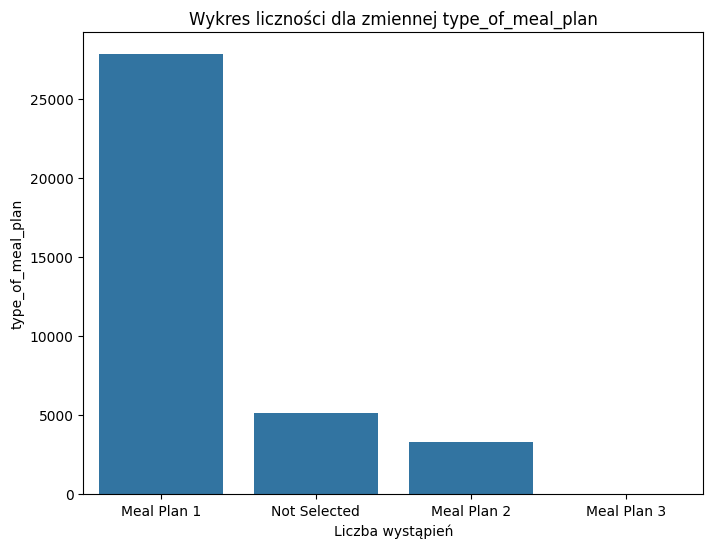

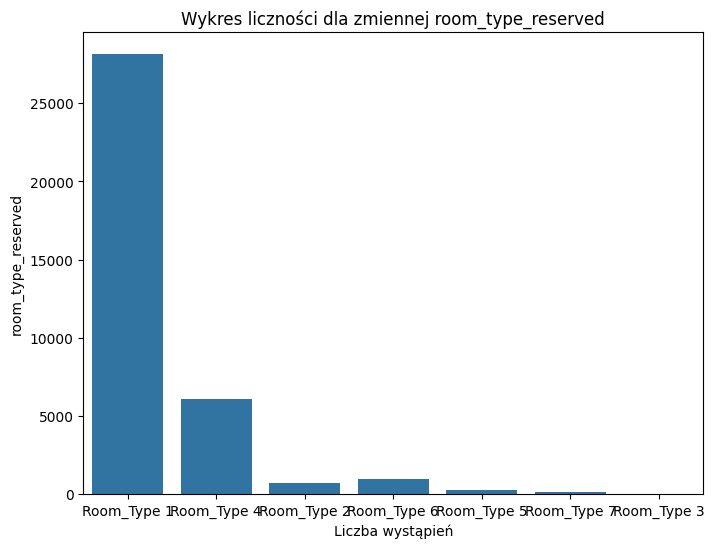

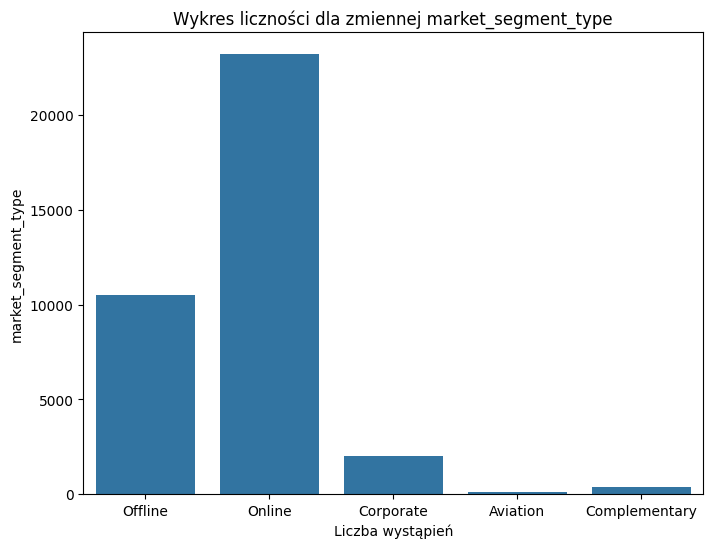

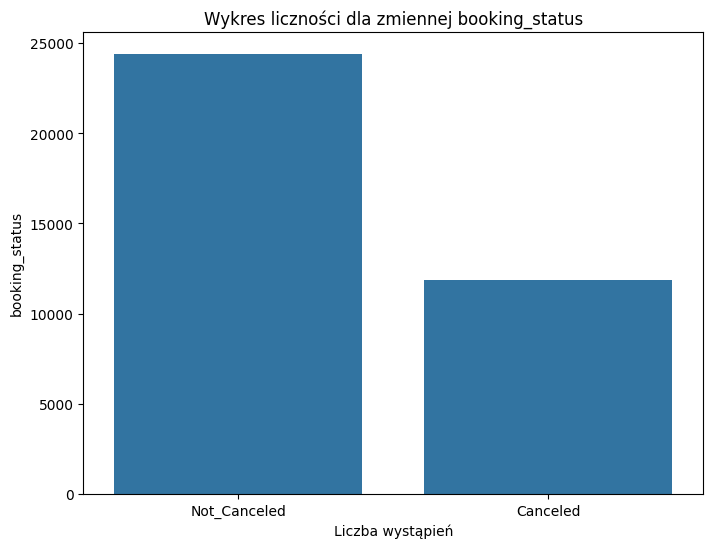

In [55]:
dataAnalysis.plotCounts(data)

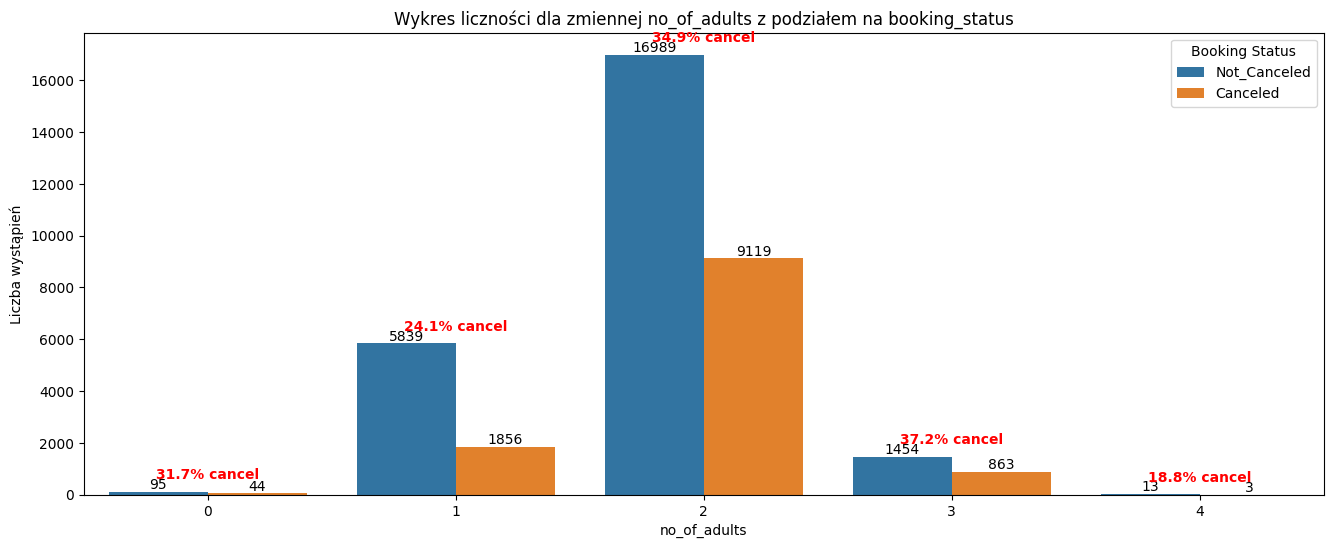

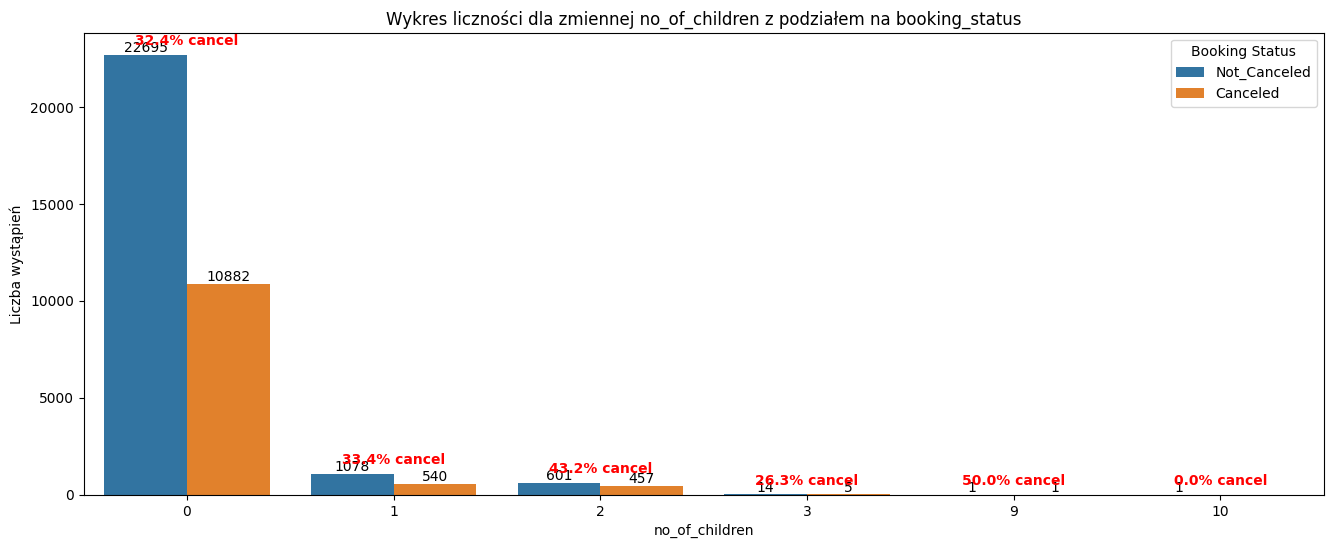

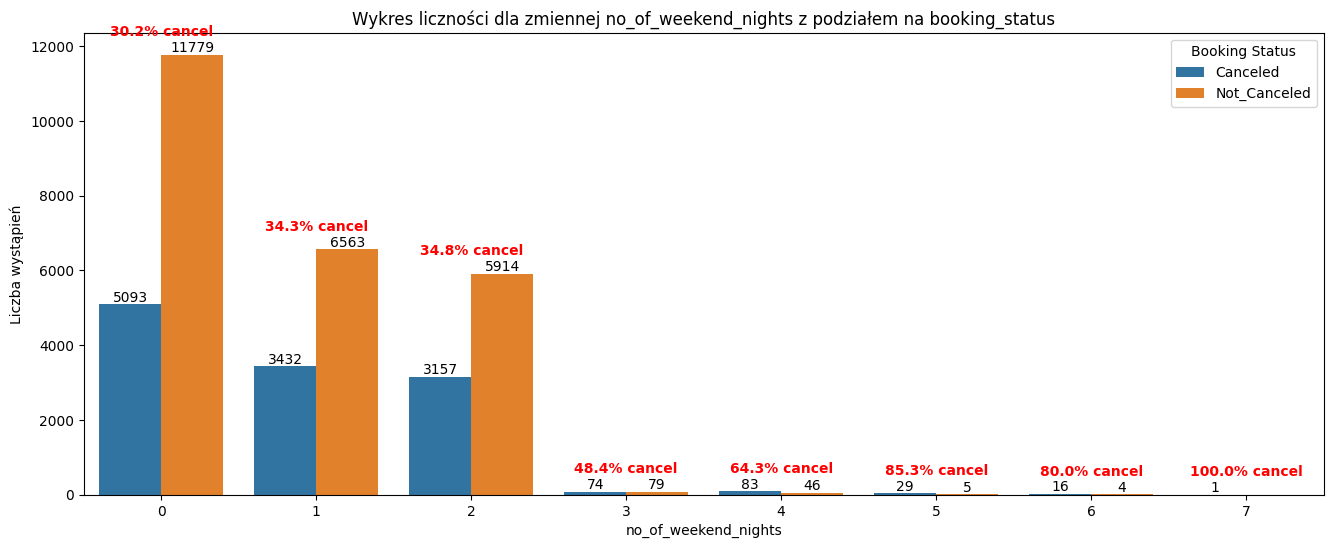

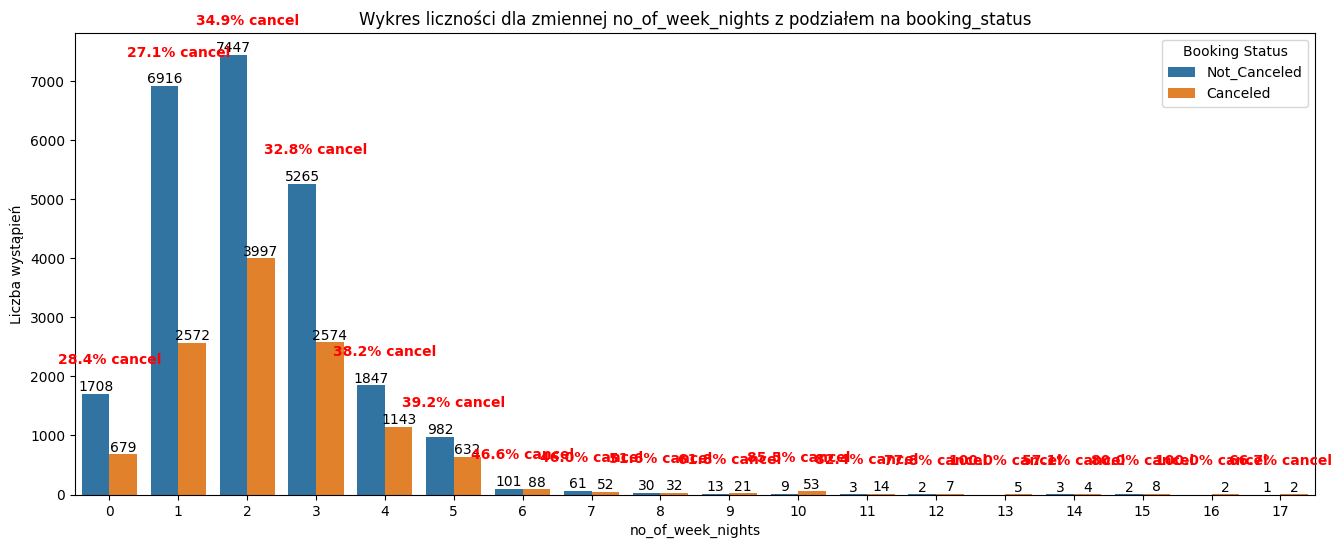

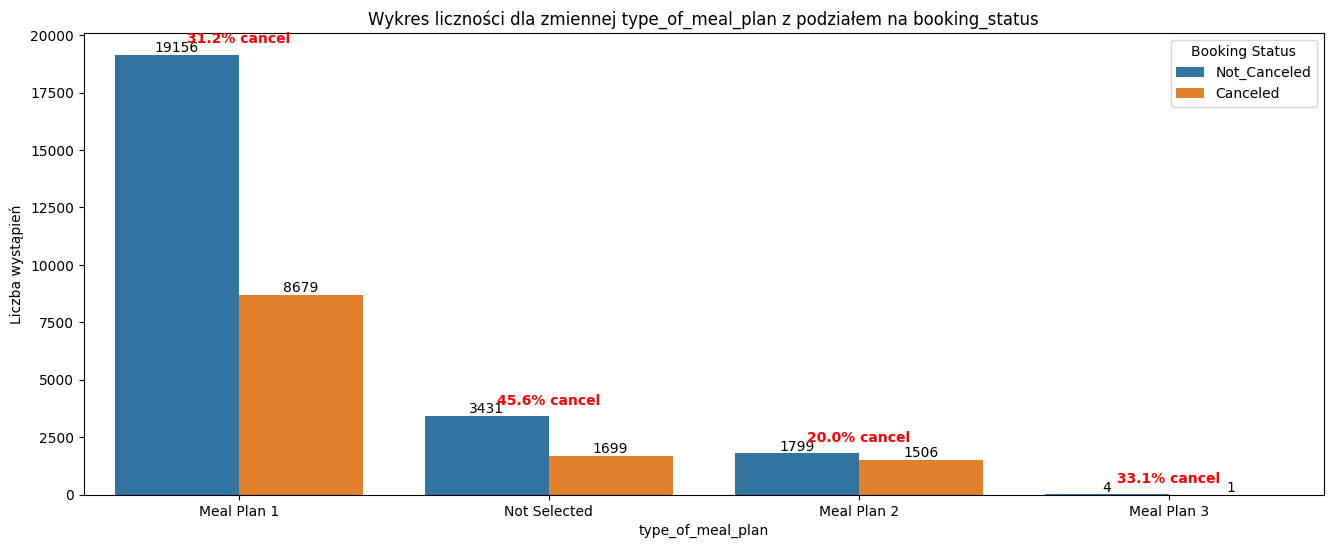

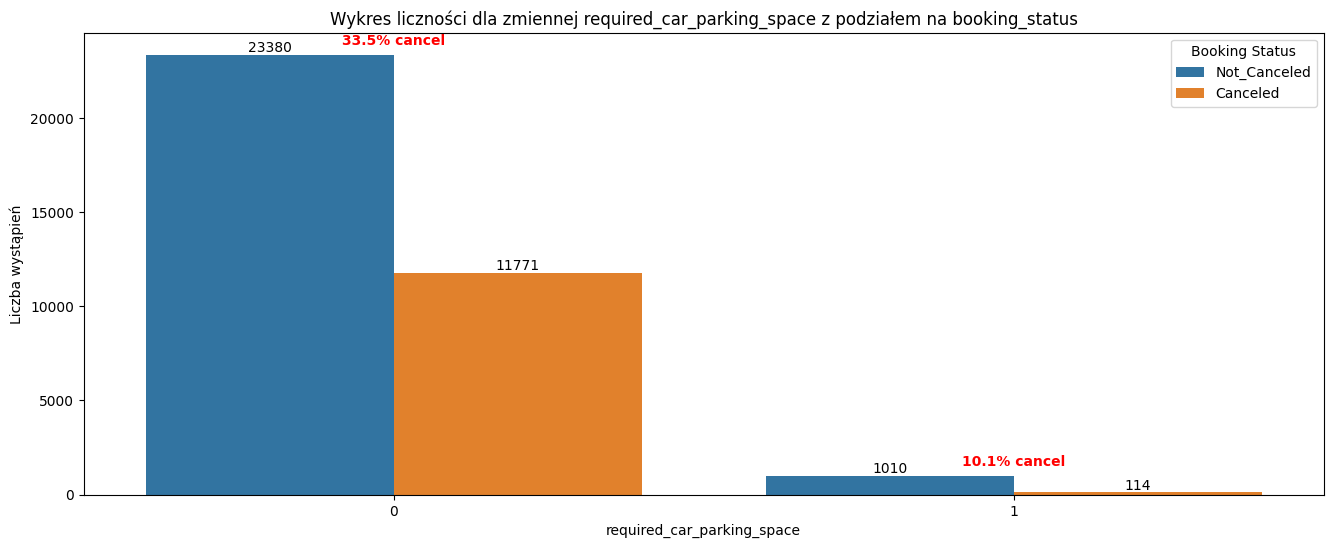

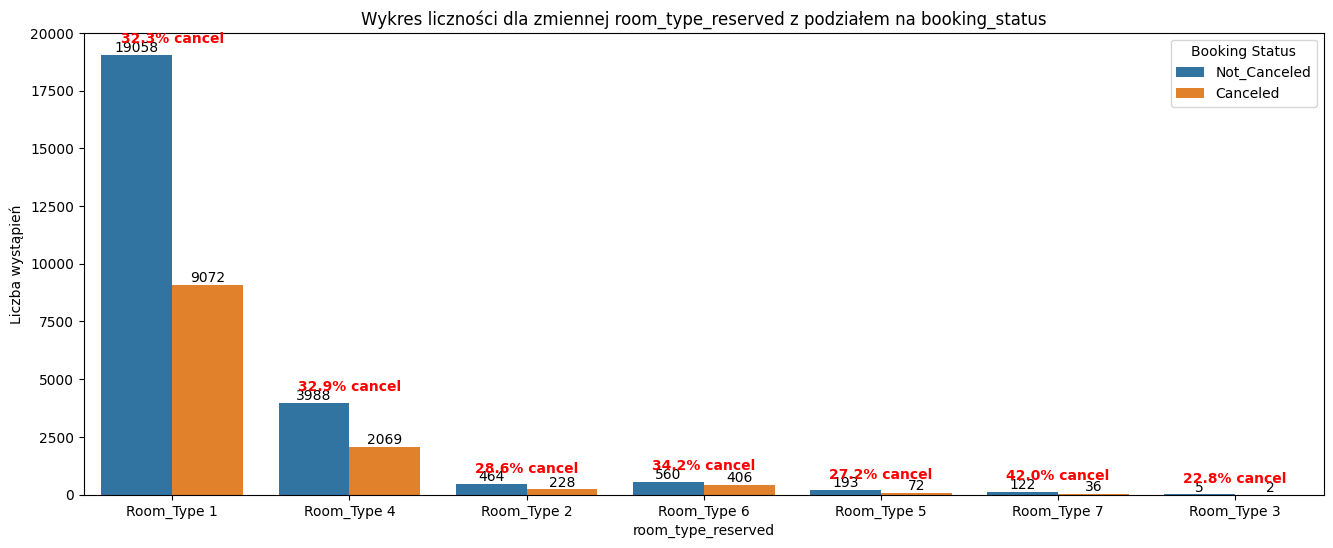

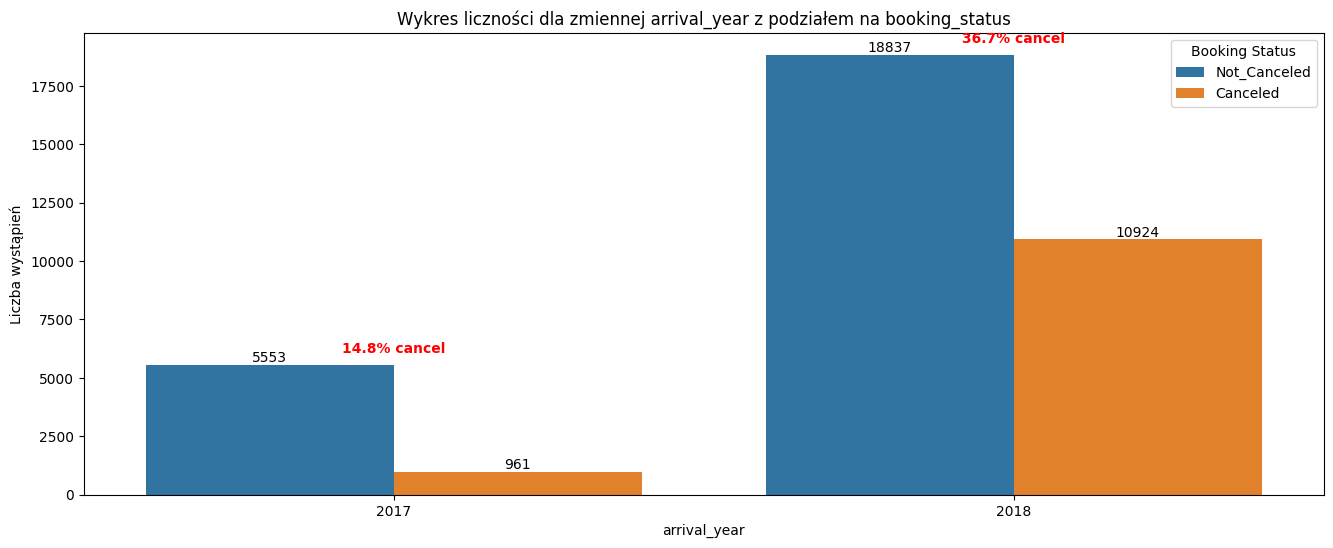

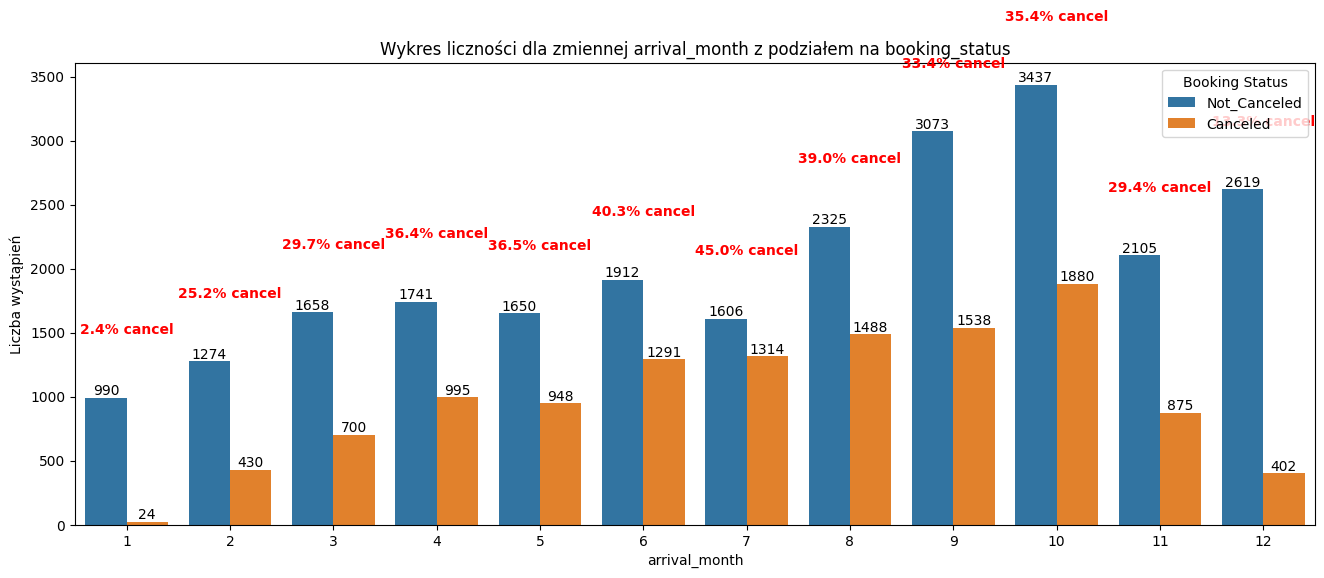

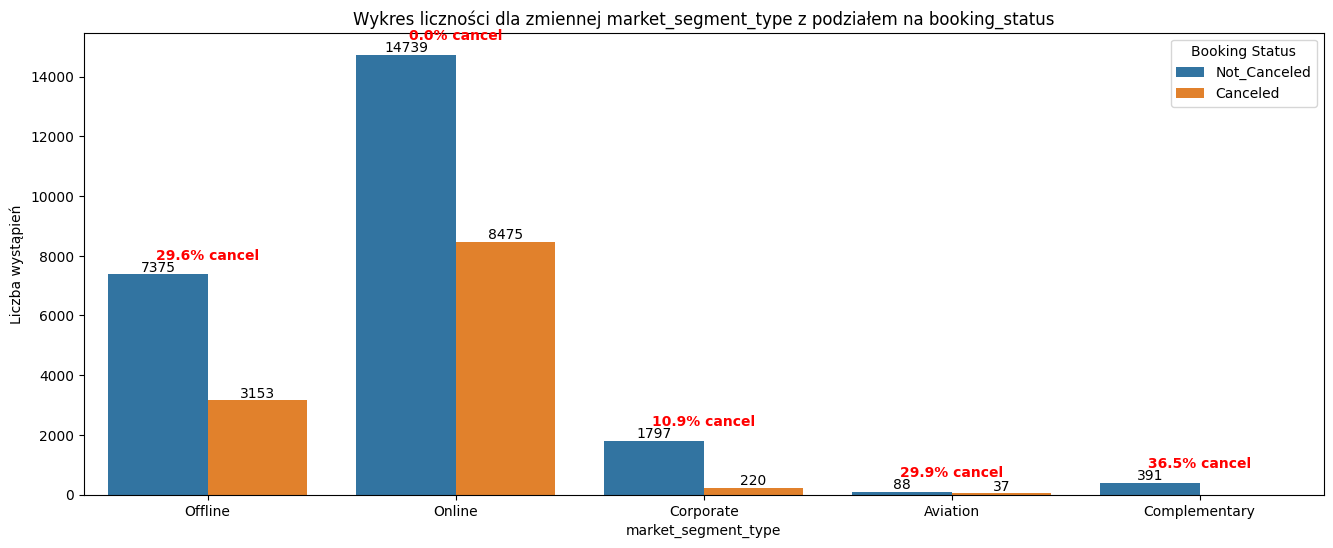

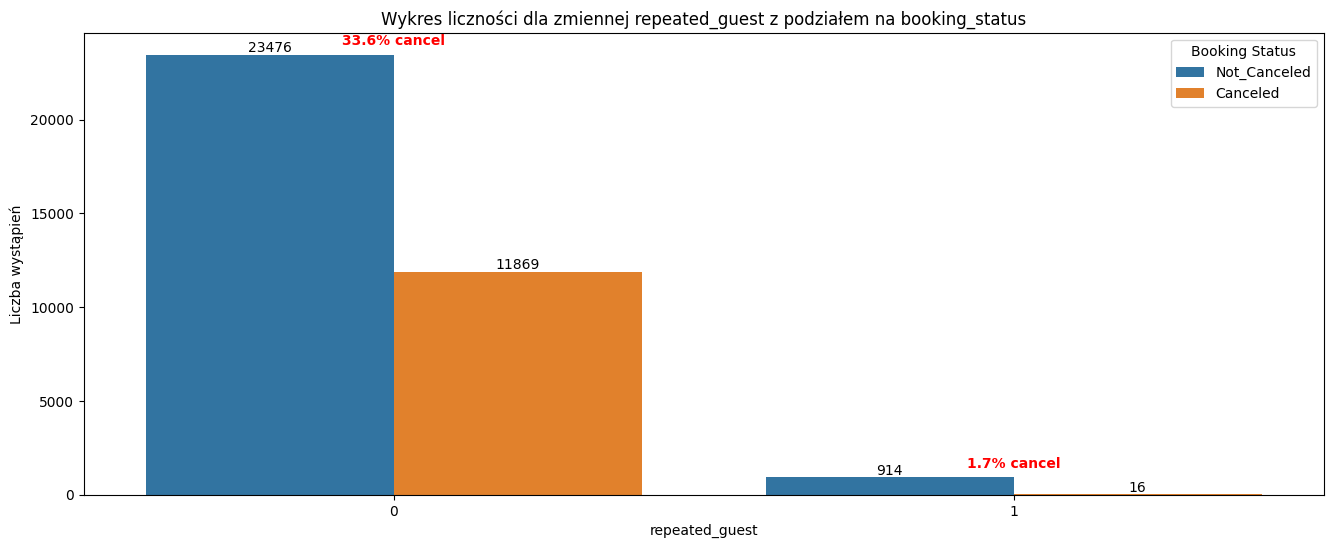

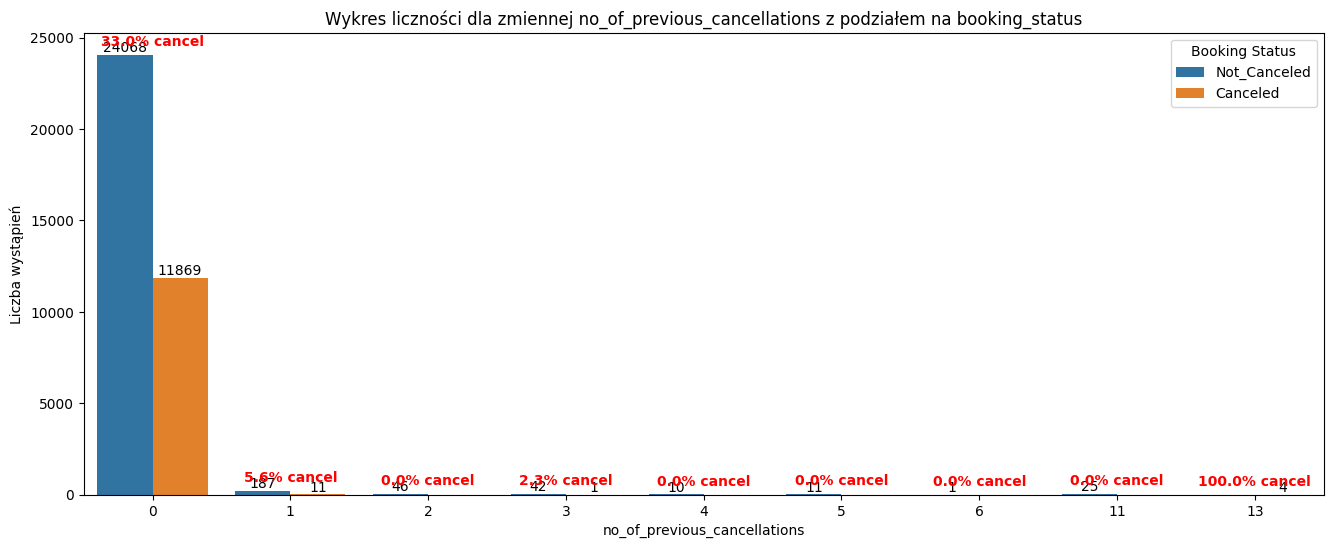

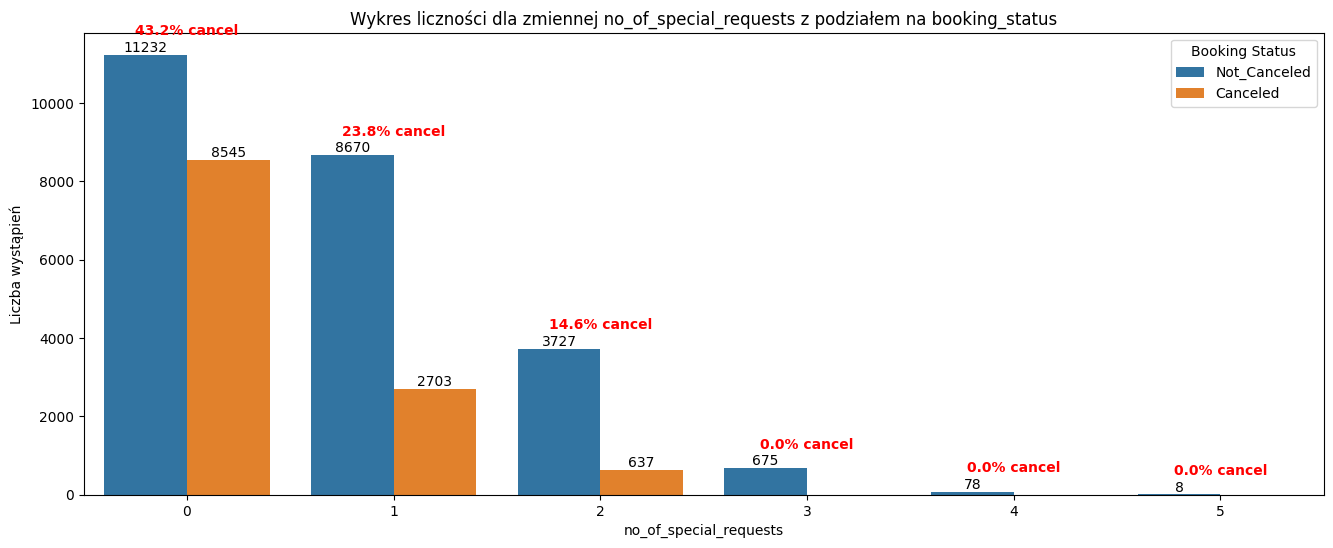

In [56]:
dataAnalysis.plotBarCharts(data)

c:\Users\Admin\Desktop\Knds\Projekt_KNDS\Nootebooks\dataAnalysis.py:164: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df.groupby([columnName, 'booking_status']).size().unstack()


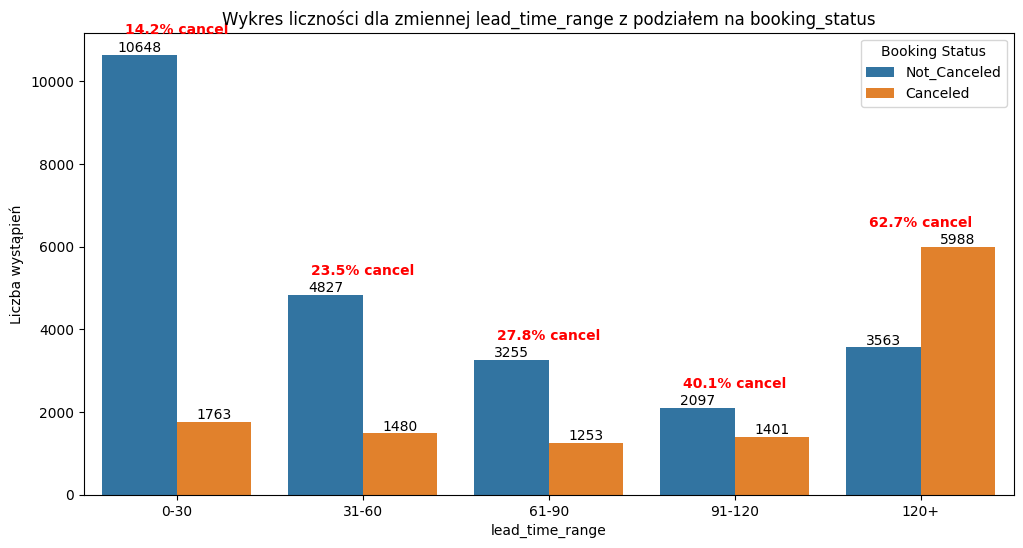

c:\Users\Admin\Desktop\Knds\Projekt_KNDS\Nootebooks\dataAnalysis.py:164: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df.groupby([columnName, 'booking_status']).size().unstack()


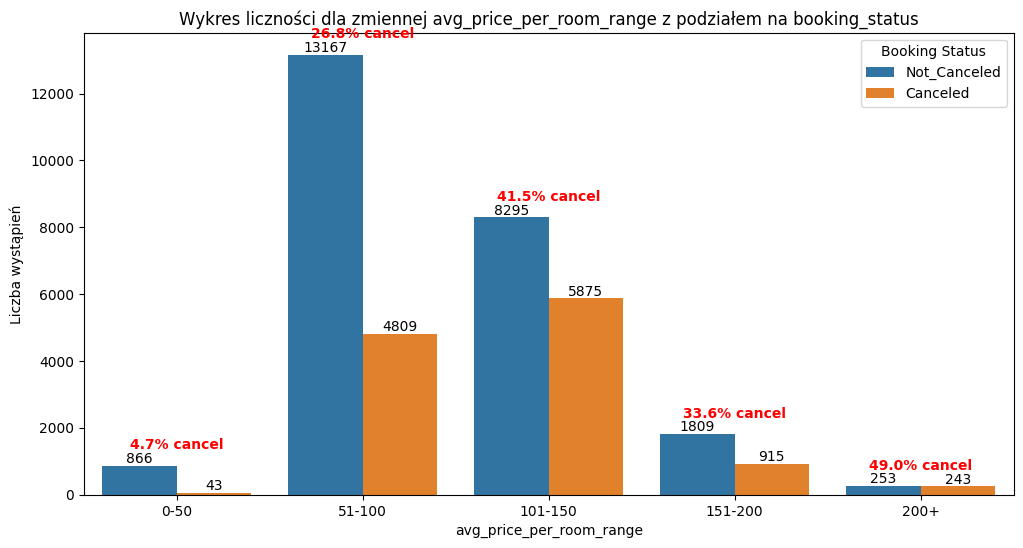

In [57]:
dataAnalysis.plotDenseBarCharts(data)

  4. Analiza wartości odstających

In [58]:
dataAnalysis.startIQRAnalysis(data)

Number of outliers in no_of_adults:
 10167
Number of outliers in no_of_children:
 2698
Number of outliers in no_of_weekend_nights:
 21
Number of outliers in no_of_week_nights:
 324
Number of outliers in required_car_parking_space:
 1124
Number of outliers in lead_time:
 1331
Number of outliers in arrival_year:
 6514
Number of outliers in arrival_month:
 0
Number of outliers in arrival_date:
 0
Number of outliers in repeated_guest:
 930
Number of outliers in no_of_previous_cancellations:
 338
Number of outliers in no_of_previous_bookings_not_canceled:
 812
Number of outliers in avg_price_per_room:
 1696
Number of outliers in no_of_special_requests:
 761


  5. Wartości odstające - wykresy

  6. Współczynnik korealcji Pearsona

In [59]:
dataAnalysis.correlationCoefficient(data)

['no_of_adults', 'no_of_children', np.float64(-0.01978707355793209)]
['no_of_adults', 'no_of_weekend_nights', np.float64(0.10331577522391473)]
['no_of_adults', 'no_of_week_nights', np.float64(0.10562190100313681)]
['no_of_adults', 'required_car_parking_space', np.float64(0.011428744691347945)]
['no_of_adults', 'lead_time', np.float64(0.09728651035955285)]
['no_of_adults', 'arrival_year', np.float64(0.07671928950617037)]
['no_of_adults', 'arrival_month', np.float64(0.021841470547424004)]
['no_of_adults', 'arrival_date', np.float64(0.026337868434581937)]
['no_of_adults', 'repeated_guest', np.float64(-0.19227693931856774)]
['no_of_adults', 'no_of_previous_cancellations', np.float64(-0.04742574729059412)]
['no_of_adults', 'no_of_previous_bookings_not_canceled', np.float64(-0.11916579302273704)]
['no_of_adults', 'avg_price_per_room', np.float64(0.2968857360658217)]
['no_of_adults', 'no_of_special_requests', np.float64(0.1894009513721449)]
['no_of_children', 'no_of_weekend_nights', np.float6

  7. Korelacja zmiennych - wykresy

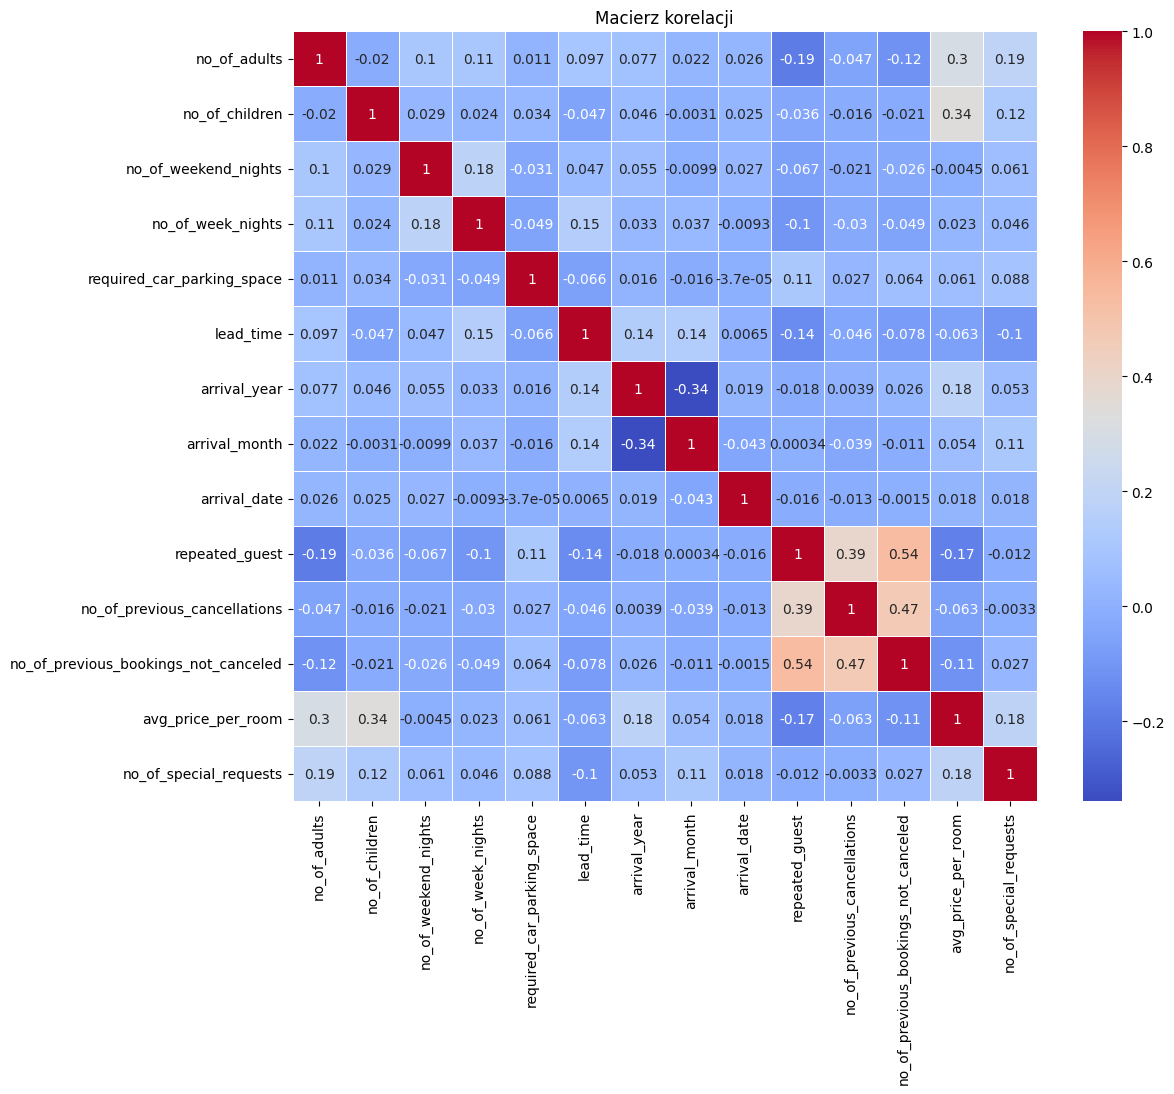

In [60]:
# Do pokazania korealacji miezy zmiennymi najlepsza jest heatmap, bo pokazuje korelacje między wszystkimi zmiennymi jednocześnie.

dataAnalysis.plotHeatmap(data)

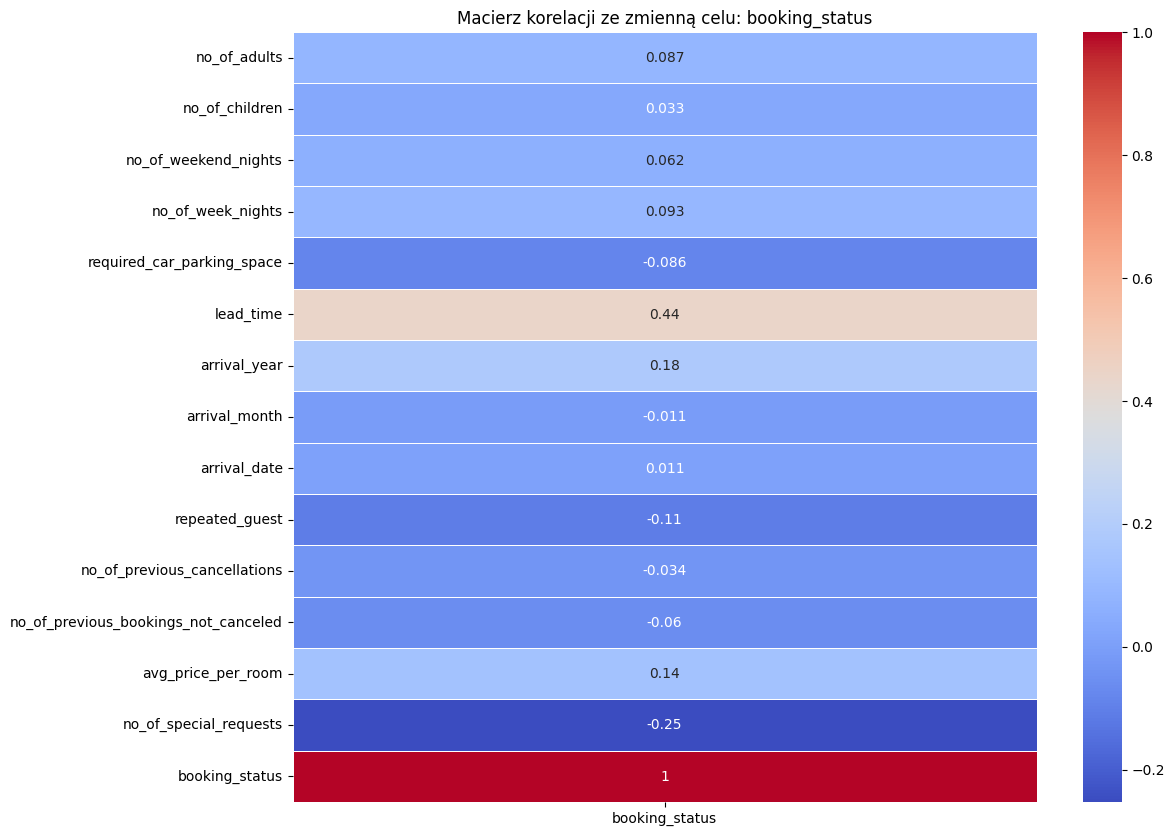

In [61]:
dataAnalysis.plotCorrelationWithTarget(data)

  8. Zależności między kolumnami numerycznymi a zmienną celu

Zmienna celu dla wykresów: booking_status


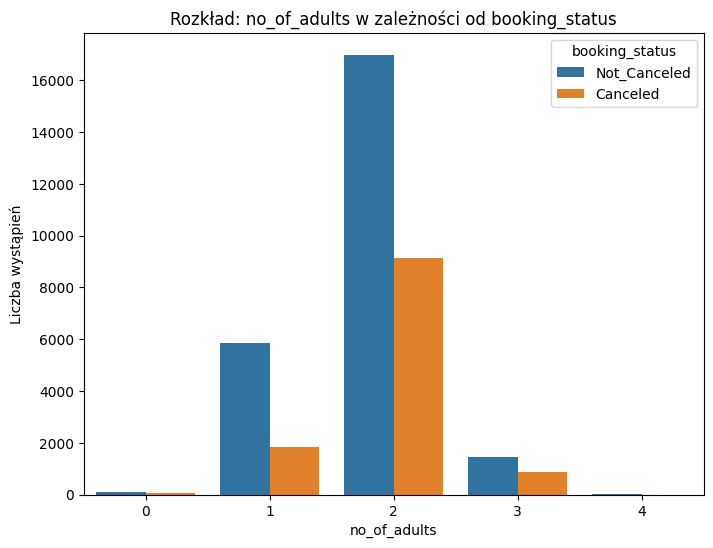

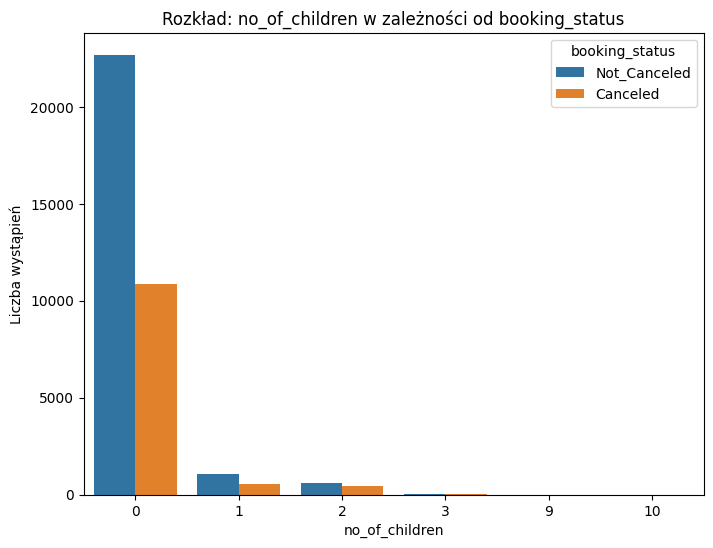

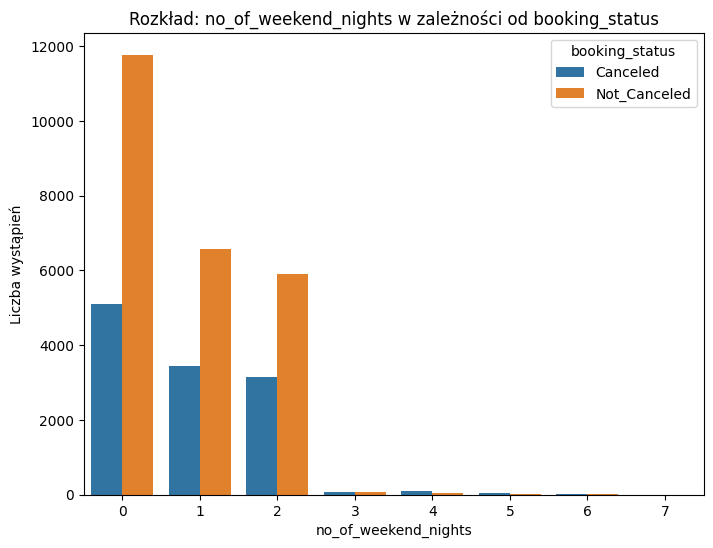

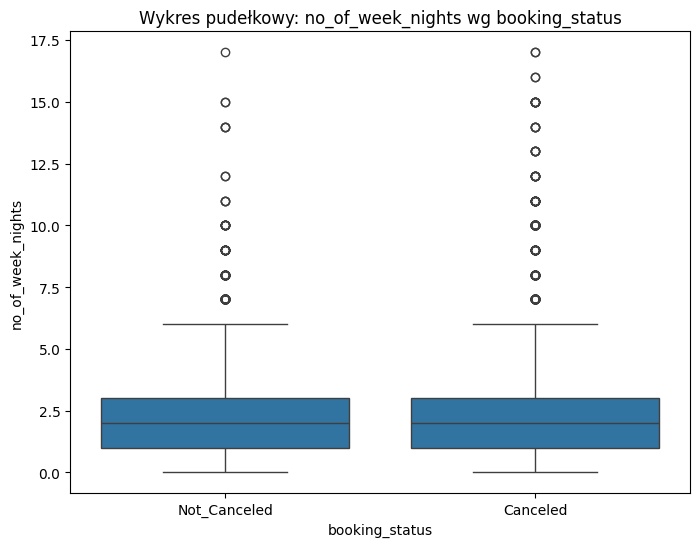

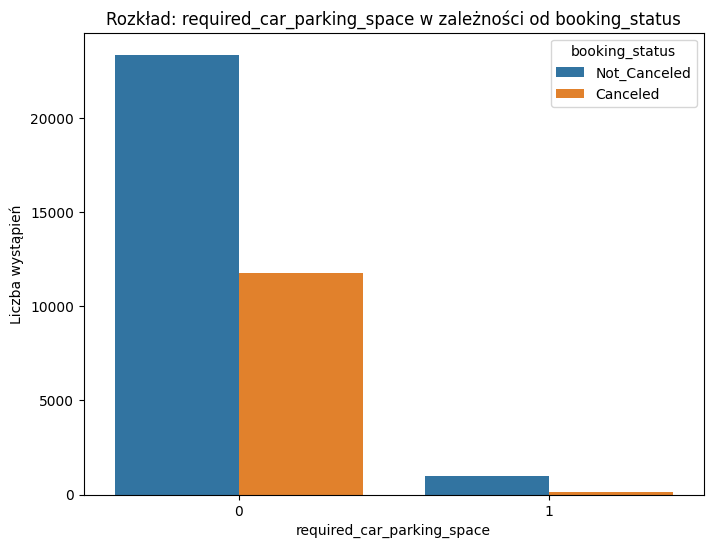

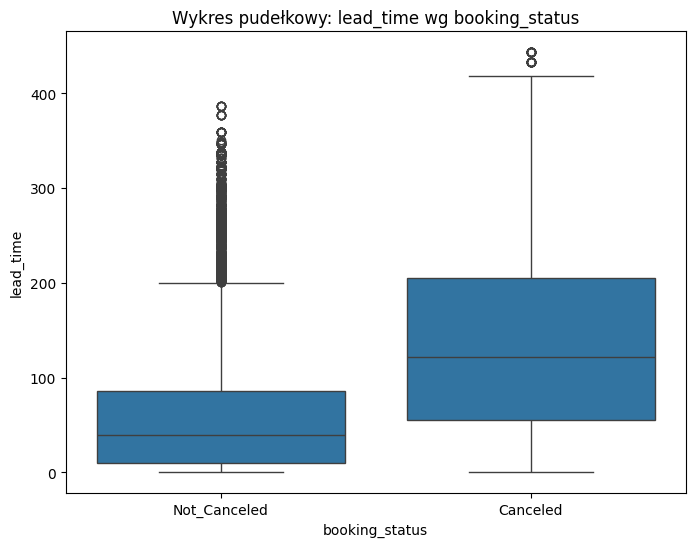

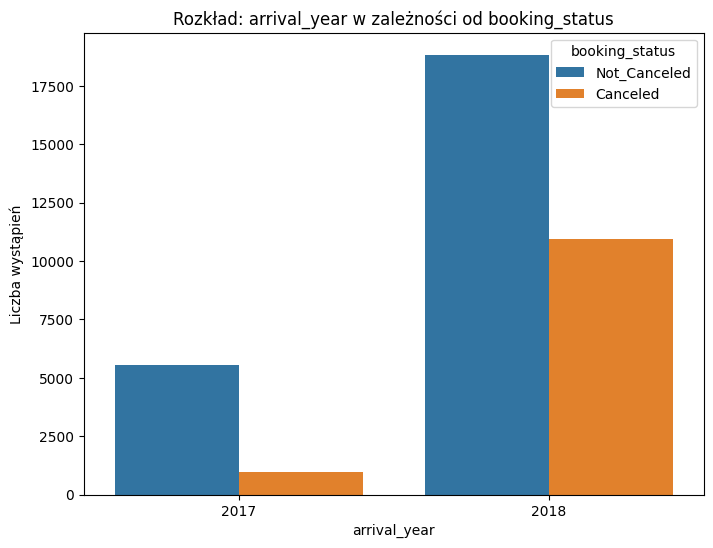

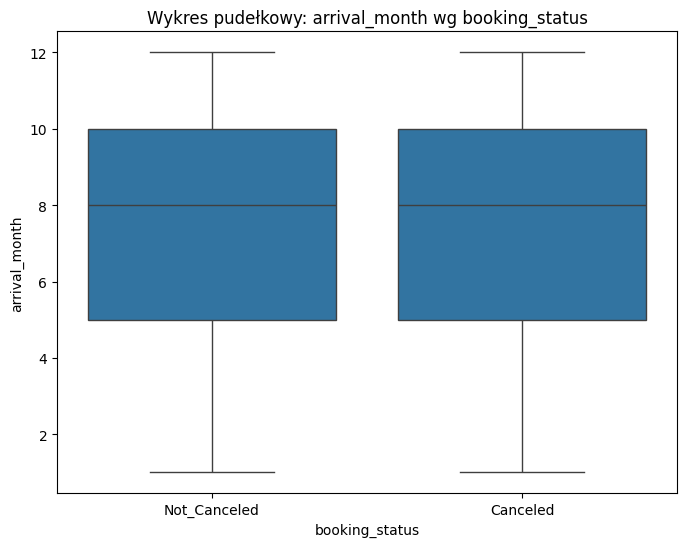

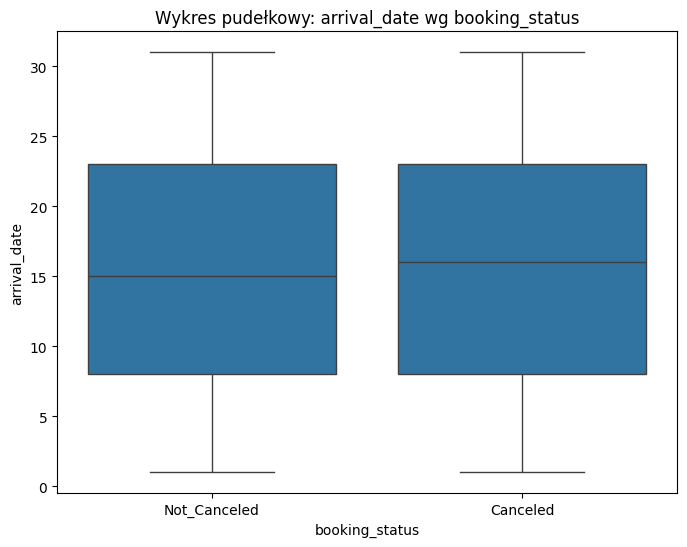

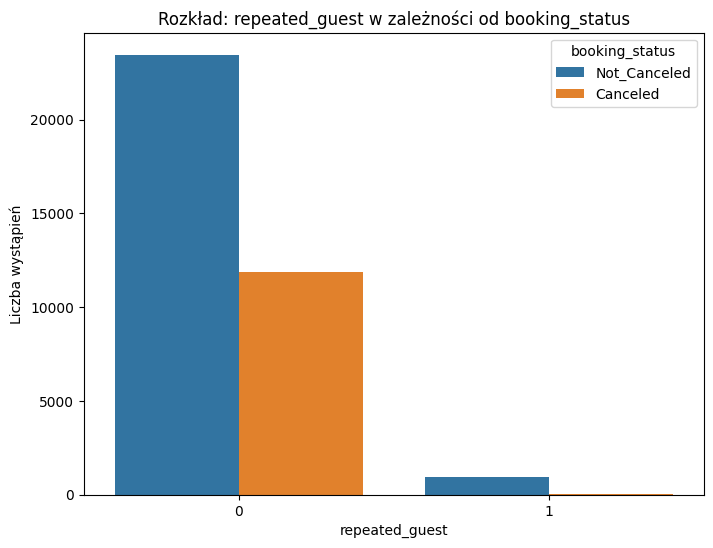

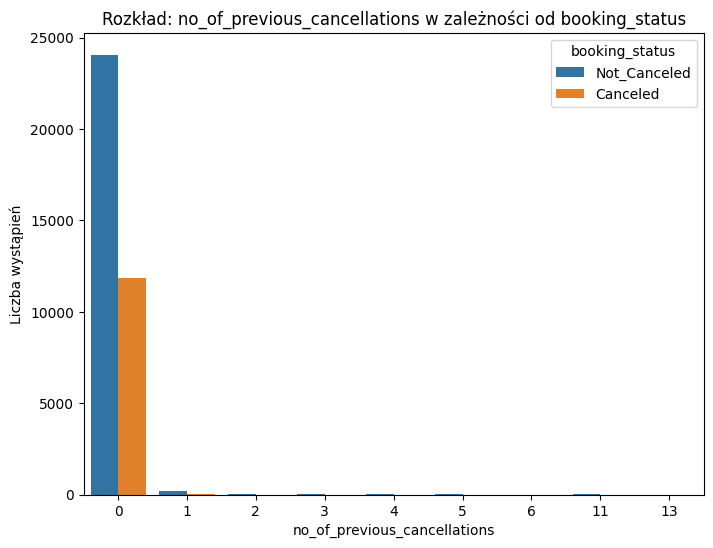

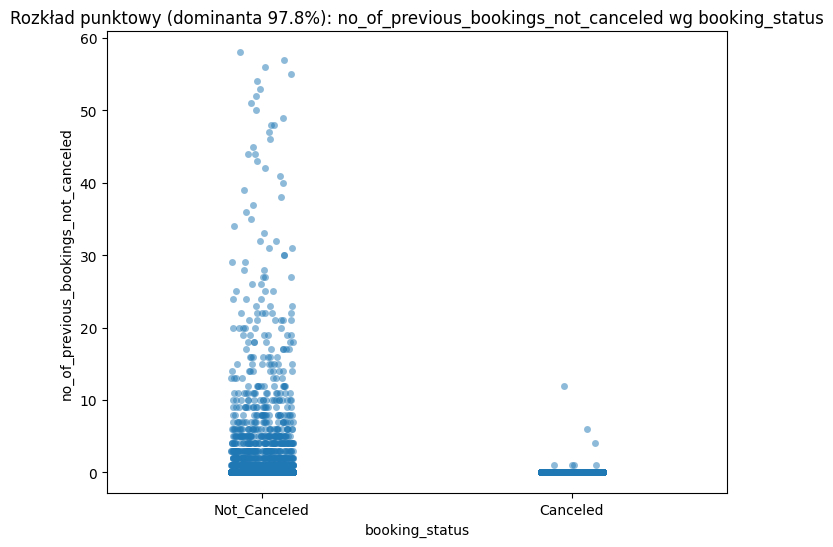

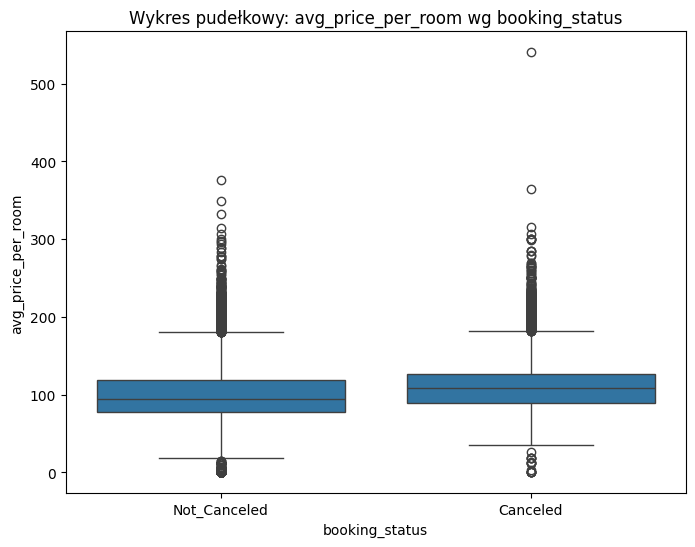

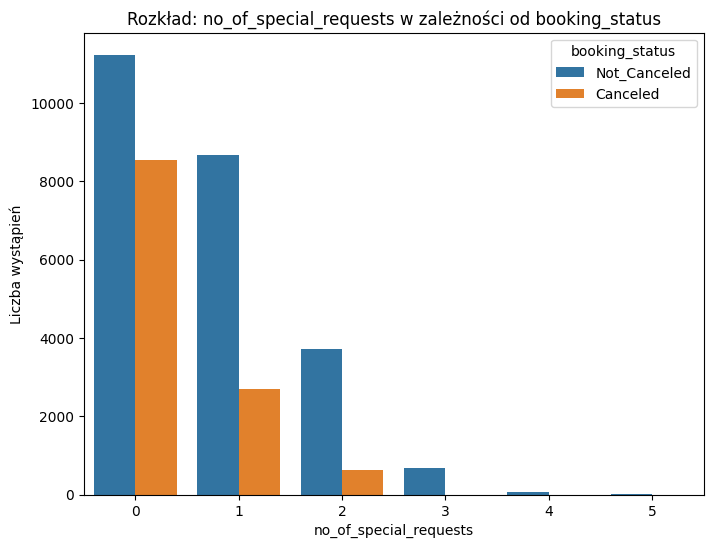

In [62]:
dataAnalysis.plotDiagramsForTargetVar(data)

**Przetworzenie danych i przygotowanie zbiorów**

In [63]:
# Trzeba dropnąć Booking_ID i arrival bo wywali 30k kolumn

data = getData(dataFilePath)
data = data.drop(columns=['Booking_ID'])

X_train, X_test, X_val, y_train, y_test, y_val = dataProcessing.processData(data)


Processing data...
Splitting data...
All feratures:  ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']
Numerical features:  ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']
Categorical features:  ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']
Processed training dataset: 
   no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0      0.301056       -0.261851             -

**Trening - Regresja logistyczna i Drzewo decyzyjne**

1. Regresja logistyczna

Training Logistic Regression model...
Dataset 1 (Diagonal) - Logistic Regression Accuracy: 0.8082
Coefficients of the Logistic Regression model: [[ 0.04967515  0.05193011  0.12177208  0.03950364 -0.25667107  1.33115602
   0.16467655 -0.13946063  0.01177777 -0.37545607  0.09660971 -0.17948899
   0.65201524 -1.15348156 -0.48273035 -0.34159809  0.18990375 -0.27145519
   0.46013459 -0.0216872   0.06773531  0.22458959 -0.33899953 -0.48841167
  -0.80924097  0.7898313  -1.33004514 -0.12175456 -0.99817685  0.75426536]]
Intercept of the Logistic Regression model: [-1.29280427]
Accuracy of the model:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      2439
           1       0.74      0.64      0.69      1189

    accuracy                           0.81      3628
   macro avg       0.79      0.76      0.77      3628
weighted avg       0.80      0.81      0.80      3628



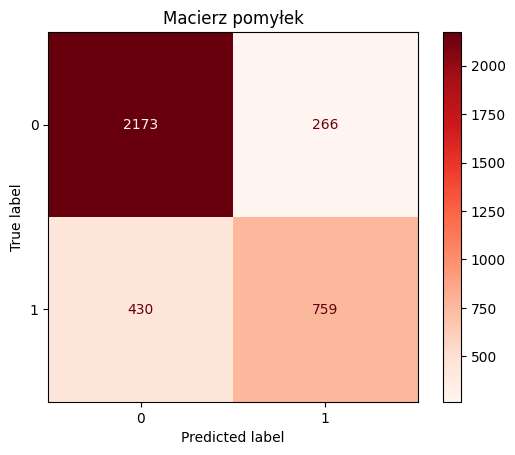

ROC AUC: 0.8636


In [64]:
logistic_regression_model = logisticRegressionModel.logisticRegressionTrain(X_train, X_test, y_train, y_test)
modelDescription.modelBenchmark(logistic_regression_model, X_test, y_test)
modelDescription.confusionMatrix(logistic_regression_model, X_test, y_test)
modelDescription.show_roc_auc(y_test, logistic_regression_model.predict_proba(X_test)[:, 1])

HPO dla regresji logistycznej

Conducting Hyperparameter Optimization for Decision Tree...
Best Hyperparameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy of the model:
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      2439
           1       0.81      0.80      0.80      1189

    accuracy                           0.87      3628
   macro avg       0.85      0.85      0.85      3628
weighted avg       0.87      0.87      0.87      3628



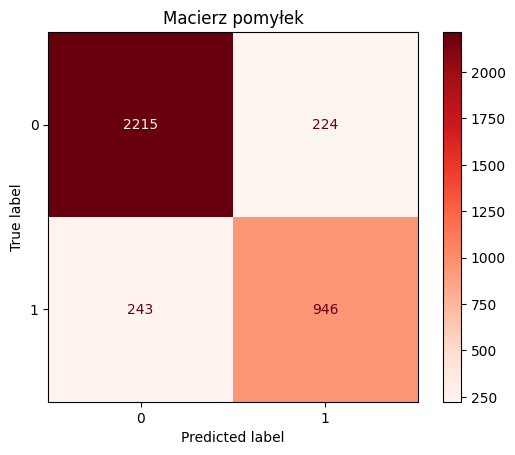

ROC AUC: 0.8636
ROC AUC: 0.9029


In [65]:
best_logistic_regression_model = decisionTreeModel.conductHPO(X_train, y_train)
y_pred_base = logistic_regression_model.predict_proba(X_test)[:, 1]
y_pred_hpo = best_logistic_regression_model.predict_proba(X_test)[:, 1]
modelDescription.modelBenchmark(best_logistic_regression_model, X_test, y_test)
modelDescription.confusionMatrix(best_logistic_regression_model, X_test, y_test)
modelDescription.show_roc_auc(y_test, y_pred_base)
modelDescription.show_roc_auc(y_test, y_pred_hpo)

2. Drzewo decyzyjne

Training Decision Tree model...
Dataset 1 (Diagonal) - Decision Tree Accuracy: 0.8666
Accuracy of the model:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      2439
           1       0.79      0.80      0.80      1189

    accuracy                           0.87      3628
   macro avg       0.85      0.85      0.85      3628
weighted avg       0.87      0.87      0.87      3628



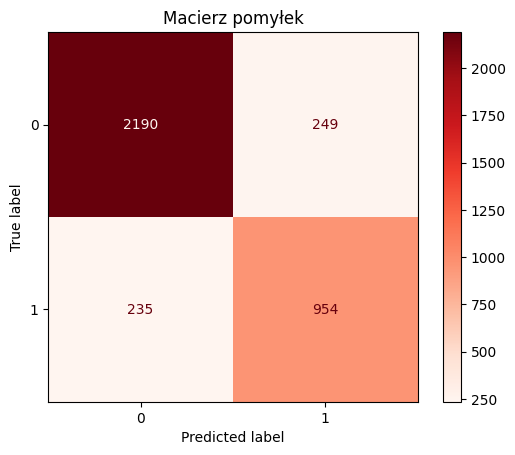

ROC AUC: 0.8550


In [66]:
decsion_tree_model = decisionTreeModel.decisionTreeTrain(X_train, X_test, y_train, y_test)
modelDescription.modelBenchmark(decsion_tree_model,X_test,y_test)
modelDescription.confusionMatrix(decsion_tree_model,X_test,y_test)
modelDescription.show_roc_auc(y_test, decsion_tree_model.predict_proba(X_test)[:, 1])


HPO dla drzewa decyzyjnego

Conducting Hyperparameter Optimization for Decision Tree...
Best Hyperparameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5}
Accuracy of the model:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      2439
           1       0.80      0.79      0.80      1189

    accuracy                           0.87      3628
   macro avg       0.85      0.85      0.85      3628
weighted avg       0.87      0.87      0.87      3628



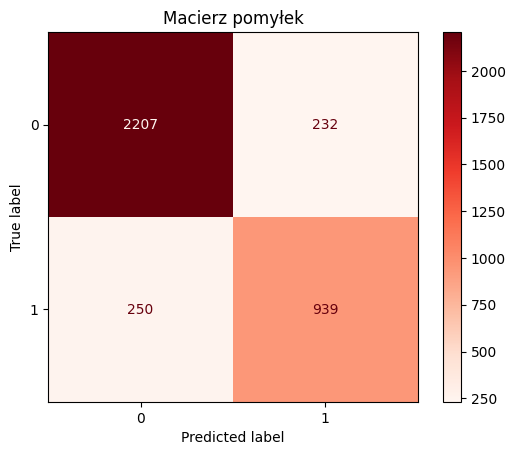

ROC AUC: 0.8550
ROC AUC: 0.9003


In [67]:
best_decision_tree_model = decisionTreeModel.conductHPO(X_train, y_train)
y_pred_base = decsion_tree_model.predict_proba(X_test)[:, 1]
y_pred_hpo = best_decision_tree_model.predict_proba(X_test)[:, 1]
modelDescription.modelBenchmark(best_decision_tree_model, X_test, y_test)
modelDescription.confusionMatrix(best_decision_tree_model, X_test, y_test)
modelDescription.show_roc_auc(y_test, y_pred_base)
modelDescription.show_roc_auc(y_test, y_pred_hpo)

Random Forest

Rozpoczynam Optymalizację Hiperparametrów dla Random Forest...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Optymalizacja zakończona
Najlepsze parametry: {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 25, 'class_weight': 'balanced'}
Najlepszy średni F1-Score z CV: 0.8369
Accuracy of the model:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      2439
           1       0.85      0.84      0.85      1189

    accuracy                           0.90      3628
   macro avg       0.89      0.88      0.89      3628
weighted avg       0.90      0.90      0.90      3628



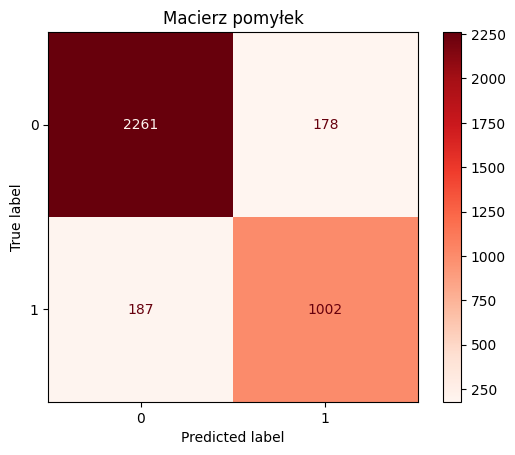

[np.False_, np.False_, np.True_, np.True_, np.False_, np.True_, np.False_, np.True_, np.True_, np.False_, np.False_, np.False_, np.True_, np.True_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_]
30


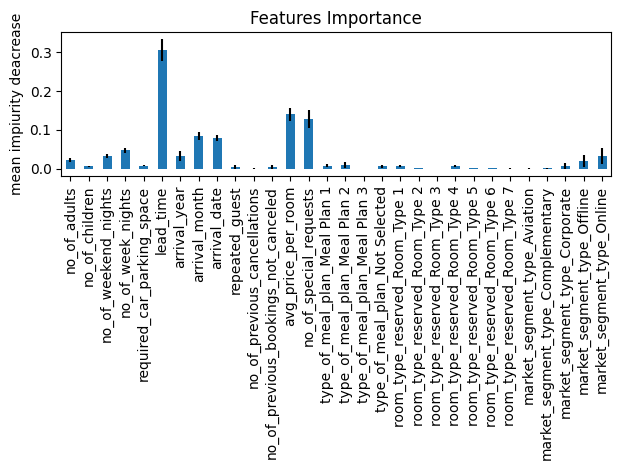

In [68]:
rf = randomForest.randomForestTraining(X_train, y_train)
modelDescription.modelBenchmark(rf, X_test, y_test)
modelDescription.confusionMatrix(rf,X_test,y_test)
cv = modelDescription.FeaturesImportance(rf, X_train)
print(len(cv))

Deleting unstable features, retraining and ploting DecisionBoundry with 2 most important features

In [69]:
X_trained_copy = X_train.loc[:,cv]
y_trained_copy = y_train
X_test_copy = X_test.loc[:,cv]
y_test_copy = y_test
print(len(X_trained_copy.columns))
print(len(X_train.columns))


7
30


Rozpoczynam Optymalizację Hiperparametrów dla Random Forest...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Optymalizacja zakończona
Najlepsze parametry: {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 25, 'class_weight': 'balanced'}
Najlepszy średni F1-Score z CV: 0.8115
Accuracy of the model:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92      2439
           1       0.85      0.79      0.82      1189

    accuracy                           0.88      3628
   macro avg       0.87      0.86      0.87      3628
weighted avg       0.88      0.88      0.88      3628



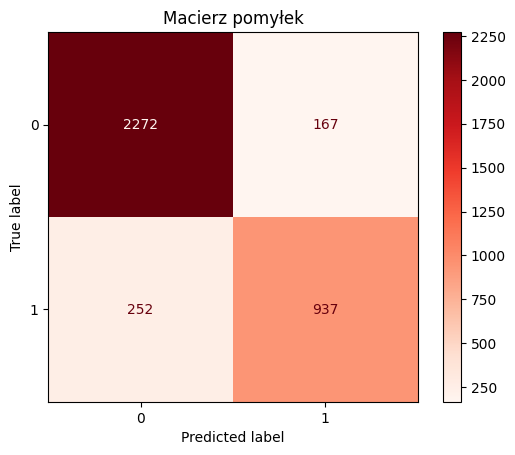

[np.False_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_]


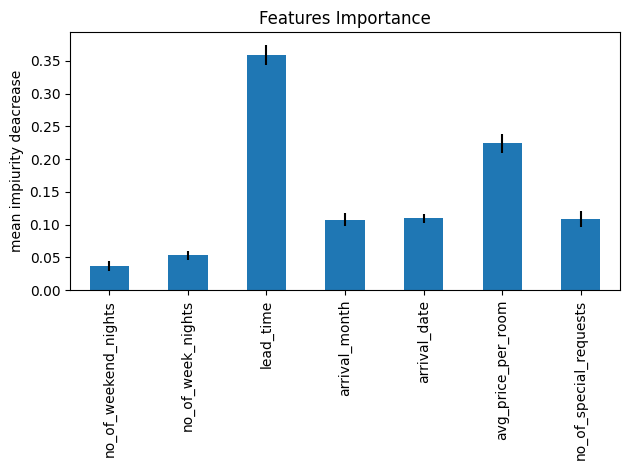

In [70]:
rf = randomForest.randomForestTraining(X_trained_copy,y_trained_copy)
modelDescription.modelBenchmark(rf,X_test_copy,y_test_copy)
modelDescription.confusionMatrix(rf,X_test_copy,y_test_copy)
cv = modelDescription.FeaturesImportance(rf,X_trained_copy)

Rozpoczynam Optymalizację Hiperparametrów dla Random Forest...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Optymalizacja zakończona
Najlepsze parametry: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 25, 'class_weight': 'balanced'}
Najlepszy średni F1-Score z CV: 0.6845
Accuracy of the model:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      2439
           1       0.70      0.66      0.68      1189

    accuracy                           0.80      3628
   macro avg       0.77      0.76      0.77      3628
weighted avg       0.79      0.80      0.80      3628



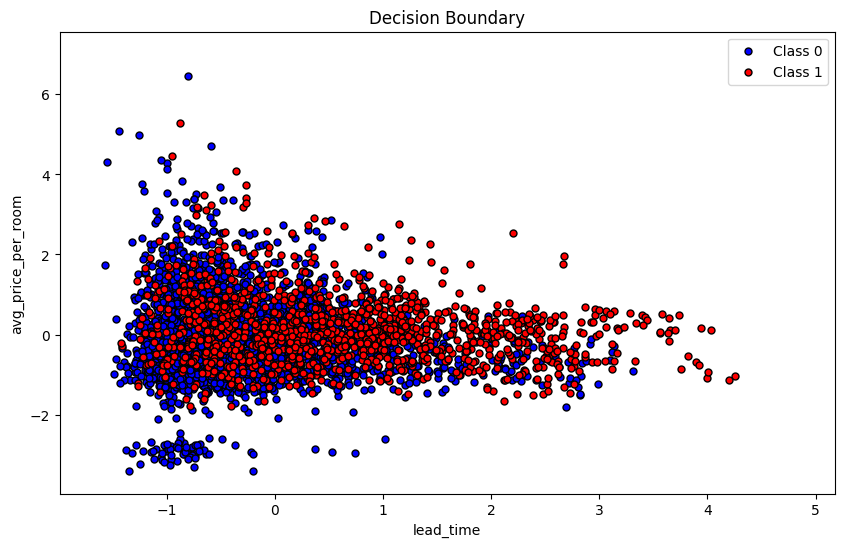

In [71]:
top_features = ["lead_time", "avg_price_per_room"]
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]
rf_top = randomForest.randomForestTraining(X_train_top, y_train)
modelDescription.modelBenchmark(rf_top, X_test_top, y_test)
modelDescription.DecisionBoundryWithJitter(rf_top, X_test_top, y_test, jitter_amount=0.2)

adaBoost

inicializing AdaBoostClassifier
Training...
Accuracy of the model:
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      2439
           1       0.75      0.71      0.73      1189

    accuracy                           0.83      3628
   macro avg       0.81      0.80      0.80      3628
weighted avg       0.83      0.83      0.83      3628

[np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.True_, np.False_, np.False_, np.False_, np.False_, np.False_, np.True_, np.True_, np.False_, np.False_, np.True_, np.False_, np.False_, np.False_, np.False_, np.False_, np.True_, np.False_, np.False_, np.False_]


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


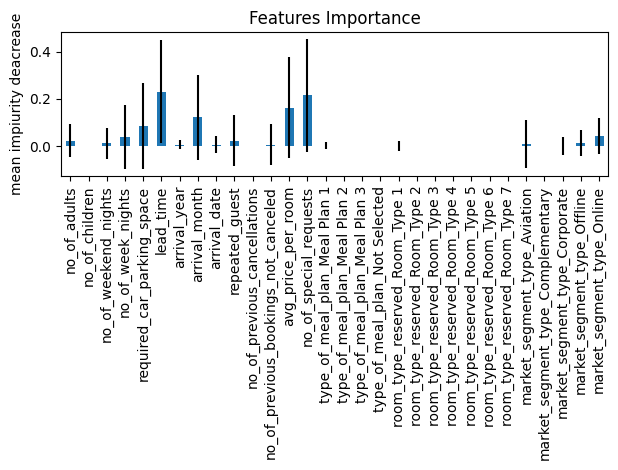

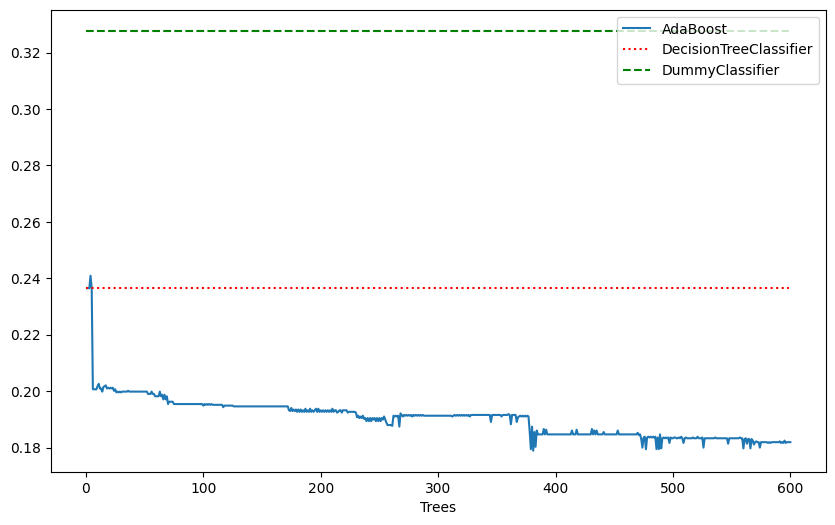

inicializing AdaBoostClassifier
Training...
Accuracy of the model:
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      2439
           1       0.75      0.71      0.73      1189

    accuracy                           0.83      3628
   macro avg       0.81      0.80      0.80      3628
weighted avg       0.83      0.83      0.83      3628

25
30


In [72]:
ad = adaBoost.adaBoostTraining(X_train, y_train)
imp = ad.feature_importances_
imp_new = list()
modelDescription.modelBenchmark(ad, X_test, y_test)
modelDescription.FeaturesImportance(ad, X_train)
adaBoost.avaBoostConvergence(X_train, y_train, X_test, y_test)
for i, val in enumerate(imp):
    if imp[i] !=0:
        imp_new.append(True)
    else:
        imp_new.append(False)
X_train_new = X_train.loc[:,imp_new]
X_test_new = X_test.loc[:,imp_new]
ad_new = adaBoost.adaBoostTraining(X_train_new,y_train)
modelDescription.modelBenchmark(ad_new,X_test_new,y_test)
print(len(X_train_new.columns))
print(len(X_train.columns))

Extrating 2 most important features in order to create DecisionBoundryDisplay

inicializing AdaBoostClassifier
Training...
Accuracy of the model:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      2439
           1       0.69      0.57      0.62      1189

    accuracy                           0.77      3628
   macro avg       0.75      0.72      0.73      3628
weighted avg       0.77      0.77      0.77      3628



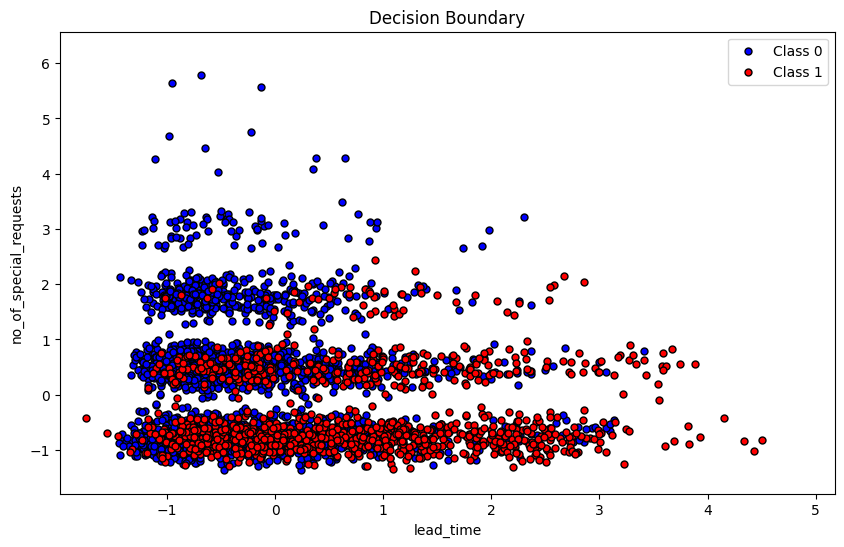

In [73]:
top_features = ["lead_time", "no_of_special_requests"]
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]
ad_top = adaBoost.adaBoostTraining(X_train_top, y_train)
modelDescription.modelBenchmark(ad_top, X_test_top, y_test)
modelDescription.DecisionBoundryWithJitter(ad_top, X_test_top, y_test, jitter_amount=0.2)